In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import sqrt
from sklearn.preprocessing import LabelEncoder

In [2]:
train_csv = pd.read_csv('./data/train.csv')
test_csv = pd.read_csv('./data/test.csv')
train_csv.head()

,Viewers_ID,Joke_identifier,Response_ID,Rating
0,A1,Klint De Drunk Enugu 1,A1_Klint De Drunk Enugu 1,0.11
1,A1,Klint De Drunk Enugu 2,A1_Klint De Drunk Enugu 2,-4.64
2,A1,Klint De Drunk PH 1,A1_Klint De Drunk PH 1,-3.39
3,A1,Klint De Drunk PH 2,A1_Klint De Drunk PH 2,0.44
4,A1,Klint De Drunk Lagos 1,A1_Klint De Drunk Lagos 1,-4.83


In [3]:
test_csv.head()

,Viewers_ID,Joke_identifier,Response_ID
0,A1,Akpororo Lagos 1,A1_Akpororo Lagos 1
1,A1,Akpororo Abuja 1,A1_Akpororo Abuja 1
2,A1,Akpororo Abuja 5,A1_Akpororo Abuja 5
3,A1,I Go Dye Benin 1,A1_I Go Dye Benin 1
4,A1,I Go Dye Benin 3,A1_I Go Dye Benin 3


In [4]:
train_data = train_csv.copy()
test_data = test_csv.copy()

In [5]:
def redefine_viewers_id(dataset):
    dataset['Viewers_ID'] = dataset['Viewers_ID'].str.slice(1)

redefine_viewers_id(train_data)
redefine_viewers_id(test_data)
train_data['Viewers_ID'] = train_data['Viewers_ID'].astype('int32')
test_data['Viewers_ID'] = test_data['Viewers_ID'].astype('int32')

In [6]:
jokes = train_data['Joke_identifier'].unique()
test_jokes = test_data['Joke_identifier'].unique()
jokes = np.append(jokes, test_jokes)
jokes = np.unique(jokes)
le = LabelEncoder()
le.fit(jokes)
def create_joke_id(dataset):
    dataset['Jokes_ID'] = le.transform(dataset['Joke_identifier'])
    
create_joke_id(train_data)
create_joke_id(test_data)

In [7]:
train_data.head()

,Viewers_ID,Joke_identifier,Response_ID,Rating,Jokes_ID
0,1,Klint De Drunk Enugu 1,A1_Klint De Drunk Enugu 1,0.11,96
1,1,Klint De Drunk Enugu 2,A1_Klint De Drunk Enugu 2,-4.64,97
2,1,Klint De Drunk PH 1,A1_Klint De Drunk PH 1,-3.39,102
3,1,Klint De Drunk PH 2,A1_Klint De Drunk PH 2,0.44,103
4,1,Klint De Drunk Lagos 1,A1_Klint De Drunk Lagos 1,-4.83,99


In [8]:
train_data['Version'] = train_data['Joke_identifier'].apply(lambda x: x.split()[-1])

In [9]:
train_data.head()

,Viewers_ID,Joke_identifier,Response_ID,Rating,Jokes_ID,Version
0,1,Klint De Drunk Enugu 1,A1_Klint De Drunk Enugu 1,0.11,96,1
1,1,Klint De Drunk Enugu 2,A1_Klint De Drunk Enugu 2,-4.64,97,2
2,1,Klint De Drunk PH 1,A1_Klint De Drunk PH 1,-3.39,102,1
3,1,Klint De Drunk PH 2,A1_Klint De Drunk PH 2,0.44,103,2
4,1,Klint De Drunk Lagos 1,A1_Klint De Drunk Lagos 1,-4.83,99,1


In [10]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 612702 entries, 0 to 612701
Data columns (total 6 columns):
Viewers_ID         612702 non-null int32
Joke_identifier    612702 non-null object
Response_ID        612702 non-null object
Rating             612702 non-null float64
Jokes_ID           612702 non-null int64
Version            612702 non-null object
dtypes: float64(1), int32(1), int64(1), object(3)
memory usage: 25.7+ MB


In [11]:
test_data['Version'] = test_data['Joke_identifier'].apply(lambda x: x.split()[-1])

In [12]:
test_data.head()

,Viewers_ID,Joke_identifier,Response_ID,Jokes_ID,Version
0,1,Akpororo Lagos 1,A1_Akpororo Lagos 1,14,1
1,1,Akpororo Abuja 1,A1_Akpororo Abuja 1,9,1
2,1,Akpororo Abuja 5,A1_Akpororo Abuja 5,13,5
3,1,I Go Dye Benin 1,A1_I Go Dye Benin 1,87,1
4,1,I Go Dye Benin 3,A1_I Go Dye Benin 3,89,3


In [13]:
train_data['Version'] = train_data['Version'].astype('int32')
test_data['Version'] = test_data['Version'].astype('int32')

In [14]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 612702 entries, 0 to 612701
Data columns (total 6 columns):
Viewers_ID         612702 non-null int32
Joke_identifier    612702 non-null object
Response_ID        612702 non-null object
Rating             612702 non-null float64
Jokes_ID           612702 non-null int64
Version            612702 non-null int32
dtypes: float64(1), int32(2), int64(1), object(2)
memory usage: 23.4+ MB


In [15]:
test_data['Place'] = test_data['Joke_identifier'].apply(lambda x: x.split()[-2])
train_data['Place'] = train_data['Joke_identifier'].apply(lambda x: x.split()[-2])
test_data['Commedian'] = test_data['Joke_identifier'].apply(lambda x: x.split()[0:-2])
train_data['Commedian'] = train_data['Joke_identifier'].apply(lambda x: x.split()[0:-2])

In [16]:
train_data.head()

,Viewers_ID,Joke_identifier,Response_ID,Rating,Jokes_ID,Version,Place,Commedian
0,1,Klint De Drunk Enugu 1,A1_Klint De Drunk Enugu 1,0.11,96,1,Enugu,"[Klint, De, Drunk]"
1,1,Klint De Drunk Enugu 2,A1_Klint De Drunk Enugu 2,-4.64,97,2,Enugu,"[Klint, De, Drunk]"
2,1,Klint De Drunk PH 1,A1_Klint De Drunk PH 1,-3.39,102,1,PH,"[Klint, De, Drunk]"
3,1,Klint De Drunk PH 2,A1_Klint De Drunk PH 2,0.44,103,2,PH,"[Klint, De, Drunk]"
4,1,Klint De Drunk Lagos 1,A1_Klint De Drunk Lagos 1,-4.83,99,1,Lagos,"[Klint, De, Drunk]"


In [17]:
train_data.sample()

,Viewers_ID,Joke_identifier,Response_ID,Rating,Jokes_ID,Version,Place,Commedian
5705,10354,Akpororo Abuja 1,A10354_Akpororo Abuja 1,0.77,9,1,Abuja,[Akpororo]


In [18]:
test_data['Commedian'] = test_data['Commedian'].apply(lambda x: " ".join(x))
train_data['Commedian'] = train_data['Commedian'].apply(lambda x: " ".join(x))

In [19]:
train_data.head()

,Viewers_ID,Joke_identifier,Response_ID,Rating,Jokes_ID,Version,Place,Commedian
0,1,Klint De Drunk Enugu 1,A1_Klint De Drunk Enugu 1,0.11,96,1,Enugu,Klint De Drunk
1,1,Klint De Drunk Enugu 2,A1_Klint De Drunk Enugu 2,-4.64,97,2,Enugu,Klint De Drunk
2,1,Klint De Drunk PH 1,A1_Klint De Drunk PH 1,-3.39,102,1,PH,Klint De Drunk
3,1,Klint De Drunk PH 2,A1_Klint De Drunk PH 2,0.44,103,2,PH,Klint De Drunk
4,1,Klint De Drunk Lagos 1,A1_Klint De Drunk Lagos 1,-4.83,99,1,Lagos,Klint De Drunk


In [20]:
test_data.head()

,Viewers_ID,Joke_identifier,Response_ID,Jokes_ID,Version,Place,Commedian
0,1,Akpororo Lagos 1,A1_Akpororo Lagos 1,14,1,Lagos,Akpororo
1,1,Akpororo Abuja 1,A1_Akpororo Abuja 1,9,1,Abuja,Akpororo
2,1,Akpororo Abuja 5,A1_Akpororo Abuja 5,13,5,Abuja,Akpororo
3,1,I Go Dye Benin 1,A1_I Go Dye Benin 1,87,1,Benin,I Go Dye
4,1,I Go Dye Benin 3,A1_I Go Dye Benin 3,89,3,Benin,I Go Dye


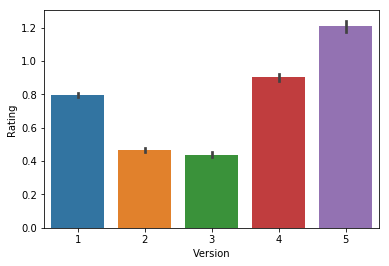

In [21]:
sns.barplot(x='Version', y='Rating', data=train_data)

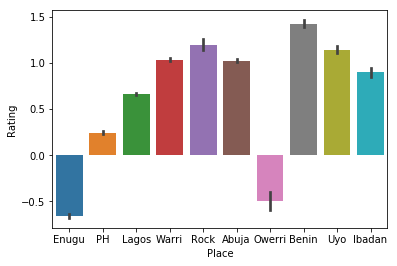

In [22]:
sns.barplot(x='Place', y='Rating', data=train_data)

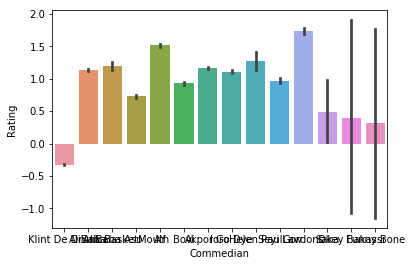

In [23]:
sns.barplot(x='Commedian', y='Rating', data=train_data)

In [24]:
commedians = train_data['Commedian'].unique()

In [25]:
commedians = np.append(commedians, test_data['Commedian'].unique())

In [26]:
commedians = np.unique(commedians)

In [27]:
commedians

array(['AY', 'Akpororo', 'AliBaba', 'AliBaba Aso', 'BasketMouth', 'Bovi',
       'Funny Bone', 'Gordons', 'Helen Paul', 'I Go Dye',
       'Klint De Drunk', 'MisterIbu', 'Okey Bakassi', 'Saka', 'Seyi Law'],
      dtype=object)

In [28]:
commedians = np.delete(commedians, 3)

In [29]:
places = np.unique(np.append(train_data['Place'].unique(), test_data['Place'].unique()))

In [30]:
places

array(['Abuja', 'Benin', 'Enugu', 'Ibadan', 'Lagos', 'Owerri', 'PH',
       'Rock', 'Uyo', 'Warri'], dtype=object)

In [31]:
places[7] = "Aso Rock"

In [32]:
places

array(['Abuja', 'Benin', 'Enugu', 'Ibadan', 'Lagos', 'Owerri', 'PH',
       'Aso Rock', 'Uyo', 'Warri'], dtype=object)

In [33]:
commedians

array(['AY', 'Akpororo', 'AliBaba', 'BasketMouth', 'Bovi', 'Funny Bone',
       'Gordons', 'Helen Paul', 'I Go Dye', 'Klint De Drunk', 'MisterIbu',
       'Okey Bakassi', 'Saka', 'Seyi Law'], dtype=object)

In [34]:
def repair_commedian(x):
    if x["Commedian"] == "AliBaba Aso":
        return "AliBaba"
    else:
        return x["Commedian"]

def repair_place(x):
    if x["Place"] == "Rock":
        return "Aso Rock"
    else:
        return x["Place"]
train_data["Place"] = train_data.apply(repair_place, axis=1)
train_data["Commedian"] = train_data.apply(repair_commedian, axis=1)

In [35]:
train_data.sample(5)

,Viewers_ID,Joke_identifier,Response_ID,Rating,Jokes_ID,Version,Place,Commedian
487941,38779,AliBaba PH 2,A38779_AliBaba PH 2,3.28,33,2,PH,AliBaba
502076,39580,AY Warri 1,A39580_AY Warri 1,-0.11,7,1,Warri,AY
608635,9757,AliBaba PH 5,A9757_AliBaba PH 5,2.19,36,5,PH,AliBaba
222182,23499,Akpororo Warri 3,A23499_Akpororo Warri 3,-2.39,20,3,Warri,Akpororo
554475,6303,Klint De Drunk Enugu 3,A6303_Klint De Drunk Enugu 3,-3.05,98,3,Enugu,Klint De Drunk


In [36]:
test_data["Place"] = test_data.apply(repair_place, axis=1)
test_data["Commedian"] = test_data.apply(repair_commedian, axis=1)

In [37]:
le = LabelEncoder()
le.fit(commedians)
def create_commedian_id(dataset):
    dataset['Commedian_ID'] = le.transform(dataset['Commedian'])
    
create_commedian_id(train_data)
create_commedian_id(test_data)

In [38]:
le = LabelEncoder()
le.fit(places)
def create_place_id(dataset):
    dataset['Place_ID'] = le.transform(dataset['Place'])
    
create_place_id(train_data)
create_place_id(test_data)

In [39]:
train_data.head()

,Viewers_ID,Joke_identifier,Response_ID,Rating,Jokes_ID,Version,Place,Commedian,Commedian_ID,Place_ID
0,1,Klint De Drunk Enugu 1,A1_Klint De Drunk Enugu 1,0.11,96,1,Enugu,Klint De Drunk,9,3
1,1,Klint De Drunk Enugu 2,A1_Klint De Drunk Enugu 2,-4.64,97,2,Enugu,Klint De Drunk,9,3
2,1,Klint De Drunk PH 1,A1_Klint De Drunk PH 1,-3.39,102,1,PH,Klint De Drunk,9,7
3,1,Klint De Drunk PH 2,A1_Klint De Drunk PH 2,0.44,103,2,PH,Klint De Drunk,9,7
4,1,Klint De Drunk Lagos 1,A1_Klint De Drunk Lagos 1,-4.83,99,1,Lagos,Klint De Drunk,9,5


In [40]:
test_data.head()

,Viewers_ID,Joke_identifier,Response_ID,Jokes_ID,Version,Place,Commedian,Commedian_ID,Place_ID
0,1,Akpororo Lagos 1,A1_Akpororo Lagos 1,14,1,Lagos,Akpororo,1,5
1,1,Akpororo Abuja 1,A1_Akpororo Abuja 1,9,1,Abuja,Akpororo,1,0
2,1,Akpororo Abuja 5,A1_Akpororo Abuja 5,13,5,Abuja,Akpororo,1,0
3,1,I Go Dye Benin 1,A1_I Go Dye Benin 1,87,1,Benin,I Go Dye,8,2
4,1,I Go Dye Benin 3,A1_I Go Dye Benin 3,89,3,Benin,I Go Dye,8,2


In [41]:
train_data['Rating'].corr(train_data['Commedian_ID'])

-0.19420264161250686

In [42]:
train_data['Place_ID'].corr(train_data['Rating'])

-0.011434038426767578

In [43]:
train_data['Rating'].corr(train_data['Version'])

0.00593902209515368

In [44]:
train_data['Rating'].corr(train_data['Viewers_ID'])

0.020423317789592357

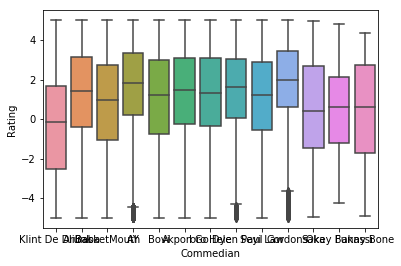

In [45]:
sns.boxplot(x="Commedian", y="Rating", data=train_data)

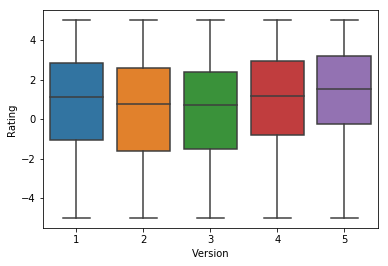

In [46]:
sns.boxplot(x="Version", y="Rating", data=train_data)

In [47]:
train_data["Rating"].describe()

count    612702.000000
mean          0.647024
std           2.667301
min          -5.000000
25%          -1.300000
50%           0.950000
75%           2.690000
max           5.000000
Name: Rating, dtype: float64

In [48]:
train_data.sample(5)

,Viewers_ID,Joke_identifier,Response_ID,Rating,Jokes_ID,Version,Place,Commedian,Commedian_ID,Place_ID
55900,13524,Klint De Drunk Lagos 3,A13524_Klint De Drunk Lagos 3,-0.97,101,3,Lagos,Klint De Drunk,9,5
421435,34800,Klint De Drunk Enugu 3,A34800_Klint De Drunk Enugu 3,-2.78,98,3,Enugu,Klint De Drunk,9,3
120065,17816,AliBaba Lagos 3,A17816_AliBaba Lagos 3,-4.95,29,3,Lagos,AliBaba,2,5
61514,13926,BasketMouth Lagos 1,A13926_BasketMouth Lagos 1,1.23,40,1,Lagos,BasketMouth,3,5
511057,40209,BasketMouth Abuja 3,A40209_BasketMouth Abuja 3,2.67,39,3,Abuja,BasketMouth,3,0


In [49]:
train_data['Commedian'].unique()

array(['Klint De Drunk', 'AliBaba', 'BasketMouth', 'AY', 'Bovi',
       'Akpororo', 'I Go Dye', 'Helen Paul', 'Seyi Law', 'Gordons',
       'Saka', 'Okey Bakassi', 'Funny Bone'], dtype=object)

In [50]:
train_data.sample(5)

,Viewers_ID,Joke_identifier,Response_ID,Rating,Jokes_ID,Version,Place,Commedian,Commedian_ID,Place_ID
11512,10707,I Go Dye Benin 3,A10707_I Go Dye Benin 3,-0.27,89,3,Benin,I Go Dye,8,2
448442,36412,Klint De Drunk Lagos 2,A36412_Klint De Drunk Lagos 2,0.52,100,2,Lagos,Klint De Drunk,9,5
353177,30863,Bovi Lagos 1,A30863_Bovi Lagos 1,3.66,52,1,Lagos,Bovi,4,5
566735,7137,Akpororo Warri 2,A7137_Akpororo Warri 2,1.34,19,2,Warri,Akpororo,1,9
593130,8852,I Go Dye Lagos 1,A8852_I Go Dye Lagos 1,-3.22,90,1,Lagos,I Go Dye,8,5


In [60]:
klint = train_data.groupby('Commedian').get_group('Klint De Drunk')
klint.sample(5)

,Viewers_ID,Joke_identifier,Response_ID,Rating,Jokes_ID,Version,Place,Commedian,Commedian_ID,Place_ID
132317,18545,Klint De Drunk Lagos 2,A18545_Klint De Drunk Lagos 2,-3.30,100,2,Lagos,Klint De Drunk,9,5
438932,35844,Klint De Drunk Lagos 2,A35844_Klint De Drunk Lagos 2,2.09,100,2,Lagos,Klint De Drunk,9,5
241560,24556,Klint De Drunk Lagos 3,A24556_Klint De Drunk Lagos 3,2.64,101,3,Lagos,Klint De Drunk,9,5
568260,7235,Klint De Drunk Lagos 1,A7235_Klint De Drunk Lagos 1,-3.94,99,1,Lagos,Klint De Drunk,9,5
265206,25891,Klint De Drunk Lagos 2,A25891_Klint De Drunk Lagos 2,1.88,100,2,Lagos,Klint De Drunk,9,5


In [52]:
klint.describe()

,Viewers_ID,Jokes_ID,Version,Commedian_ID,Place_ID
count,9958.000000,9958.000000,9958.000000,9958.0,9958.000000
mean,20348.863326,102.215003,1.779273,9.0,6.946375
std,12087.247831,1.816053,0.887395,0.0,1.993848
min,8.000000,99.000000,1.000000,9.0,5.000000
25%,9529.000000,101.000000,1.000000,9.0,5.000000
50%,19534.000000,101.000000,1.000000,9.0,5.000000
75%,31479.750000,104.000000,3.000000,9.0,9.000000
max,40862.000000,105.000000,3.000000,9.0,9.000000


In [53]:
ay = test_data.groupby('Commedian').get_group('AY')
ay.sample(5)

,Viewers_ID,Joke_identifier,Response_ID,Jokes_ID,Version,Place,Commedian,Commedian_ID,Place_ID
332622,37640,AY Lagos 4,A37640_AY Lagos 4,6,4,Lagos,AY,0,5
361409,39998,AY Abuja 1,A39998_AY Abuja 1,0,1,Abuja,AY,0,0
41194,13631,AY Abuja 1,A13631_AY Abuja 1,0,1,Abuja,AY,0,0
145826,226,AY Lagos 4,A226_AY Lagos 4,6,4,Lagos,AY,0,5
63391,15863,AY Warri 2,A15863_AY Warri 2,8,2,Warri,AY,0,9


In [54]:
dictionary = {'Commedians': [], 'Train Count': [], 'Test Count': []}
for person in commedians:
    test_count = test_data.groupby('Commedian').get_group(person)
    if person != 'MisterIbu':
        train_count =  train_data.groupby('Commedian').get_group(person)
    else:
        train_count = []
    dictionary['Commedians'].append(person)
    dictionary['Train Count'].append(len(train_count))
    dictionary['Test Count'].append(len(test_count))
table = pd.DataFrame(data=dictionary)
table

,Commedians,Train Count,Test Count
0,AY,62161,6374
1,Akpororo,63020,8997
2,AliBaba,82929,3510
3,BasketMouth,46698,1336
4,Bovi,63318,5182
5,Funny Bone,13,44331
6,Gordons,8561,72352
7,Helen Paul,1144,72630
8,I Go Dye,64809,21786
9,Klint De Drunk,201041,9958


In [58]:
import random
user_id = random.randint(1, 40864)
user_info_pd =  train_data.groupby('Viewers_ID').get_group(user_id)
user_commedians = user_info_pd['Commedian'].unique()
for commedian in user_commedians:
    user_commedian_info = user_info_pd.groupby('Commedian').get_group(commedian)
    print(commedian, user_commedian_info['Rating'].std())

Klint De Drunk 1.3635346224671623
AliBaba 2.559726547895302
BasketMouth nan
AY nan
Akpororo 0.9616652224137047


In [62]:
klint['Rating'].corr(klint['Version'])

0.007788389846632646

In [65]:
klint['Rating'].corr(klint['Place_ID'])

0.07577542912510354

In [63]:
akpo = train_data.groupby('Commedian').get_group('Akpororo')
ali = train_data.groupby('Commedian').get_group('AliBaba')
basket = train_data.groupby('Commedian').get_group('BasketMouth')
bovi = train_data.groupby('Commedian').get_group('Bovi')
bone = train_data.groupby('Commedian').get_group('Funny Bone')
gordon = train_data.groupby('Commedian').get_group('Gordons')
helen = train_data.groupby('Commedian').get_group('Helen Paul')
dye = train_data.groupby('Commedian').get_group('I Go Dye')
ibu = test_data.groupby('Commedian').get_group('MisterIbu')
okey = train_data.groupby('Commedian').get_group('Okey Bakassi')
saka = train_data.groupby('Commedian').get_group('Saka')
seyi = train_data.groupby('Commedian').get_group('Seyi Law')

In [64]:
seyi.describe()

,Viewers_ID,Rating,Jokes_ID,Version,Commedian_ID,Place_ID
count,18864.000000,18864.000000,18864.000000,18864.000000,18864.0,18864.000000
mean,20824.107241,0.968881,134.639313,2.002651,13.0,3.903626
std,11730.683789,2.553210,1.975515,0.891978,0.0,1.486242
min,34.000000,-5.000000,130.000000,1.000000,13.0,0.000000
25%,10489.250000,-0.550000,133.000000,1.000000,13.0,4.000000
50%,21806.000000,1.200000,135.000000,2.000000,13.0,4.000000
75%,30822.000000,2.890000,136.000000,3.000000,13.0,5.000000
max,40849.000000,5.000000,138.000000,4.000000,13.0,5.000000


In [86]:
train_data.groupby('Viewers_ID').get_group(1)

,Viewers_ID,Joke_identifier,Response_ID,Rating,Jokes_ID,Version,Place,Commedian,Commedian_ID,Place_ID
0,1,Klint De Drunk Enugu 1,A1_Klint De Drunk Enugu 1,0.11,96,1,Enugu,Klint De Drunk,9,3
1,1,Klint De Drunk Enugu 2,A1_Klint De Drunk Enugu 2,-4.64,97,2,Enugu,Klint De Drunk,9,3
2,1,Klint De Drunk PH 1,A1_Klint De Drunk PH 1,-3.39,102,1,PH,Klint De Drunk,9,7
3,1,Klint De Drunk PH 2,A1_Klint De Drunk PH 2,0.44,103,2,PH,Klint De Drunk,9,7
4,1,Klint De Drunk Lagos 1,A1_Klint De Drunk Lagos 1,-4.83,99,1,Lagos,Klint De Drunk,9,5
5,1,Klint De Drunk Lagos 2,A1_Klint De Drunk Lagos 2,-4.52,100,2,Lagos,Klint De Drunk,9,5
6,1,Klint De Drunk Lagos 3,A1_Klint De Drunk Lagos 3,-3.73,101,3,Lagos,Klint De Drunk,9,5
7,1,Klint De Drunk Warri 1,A1_Klint De Drunk Warri 1,-4.36,104,1,Warri,Klint De Drunk,9,9
8,1,AliBaba Lagos 2,A1_AliBaba Lagos 2,-4.39,28,2,Lagos,AliBaba,2,5
9,1,AliBaba Aso Rock 2,A1_AliBaba Aso Rock 2,4.39,26,2,Aso Rock,AliBaba,2,1
